# Strategy Example

This notebook serves as a simple example of how to define strategies and strategies wiht matrix; it also shows how to implement a simple strategy over strategies

In [1]:
import pandas as pd
import numpy as np
import matrix as mtx
import ffn

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]

In [3]:
# Loading data and define securities

securities = {}
tickers = ['SPY','AGG']
for ticker in tickers:
    data = pd.read_csv(ticker+'.csv', index_col=0, parse_dates=True)[ticker]
    securities[ticker] = mtx.nodes.Security(name = ticker, data = data)

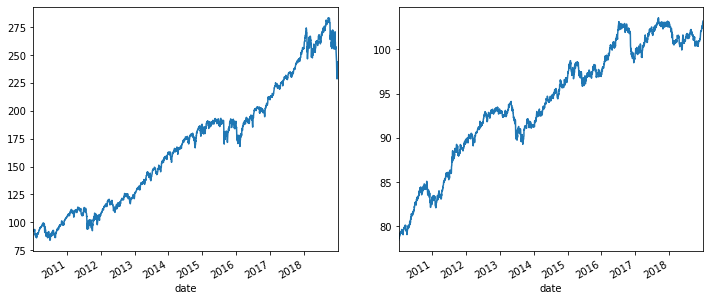

In [4]:
fig, axs = plt.subplots(1,2)

securities['SPY'].prices.plot(ax=axs[0])
securities['AGG'].prices.plot(ax=axs[1])

In [5]:
# Simple Trend Filters (Moving Average)

strategies = {}
for ticker in tickers:
    prices = securities[ticker].prices
    ma = securities[ticker].prices.rolling(250).mean()
    weights = pd.DataFrame(index=prices.index, columns=[ticker])
    
    weights[ticker][prices>=ma] = 1
    weights[ticker][prices<ma] = 0
    
    strategies[ticker+'-Trend'] = mtx.nodes.Strategy(name = ticker+'-Trend',
                                                     nodes = [securities[ticker]],
                                                     algos = [mtx.algos.Weigh(weights)])

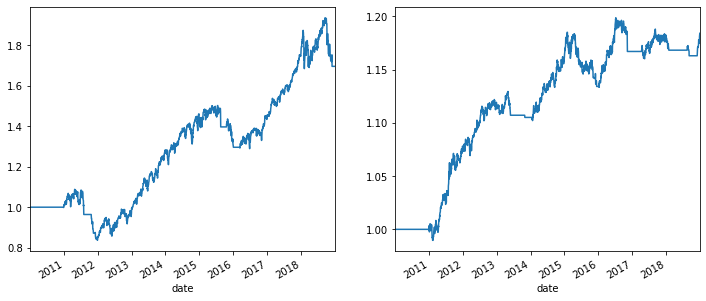

In [6]:
fig, axs = plt.subplots(1,2)

strategies['SPY-Trend'].prices.plot(ax=axs[0])
strategies['AGG-Trend'].prices.plot(ax=axs[1])

In [7]:
# Combined together

master_strategy = mtx.nodes.Strategy(name = 'master-strategy',
                                     nodes = strategies.values(),
                                     algos = [mtx.algos.SelectAll(),
                                              mtx.algos.WeighInvVol(window=250),
                                              mtx.algos.Rebalance('M')])

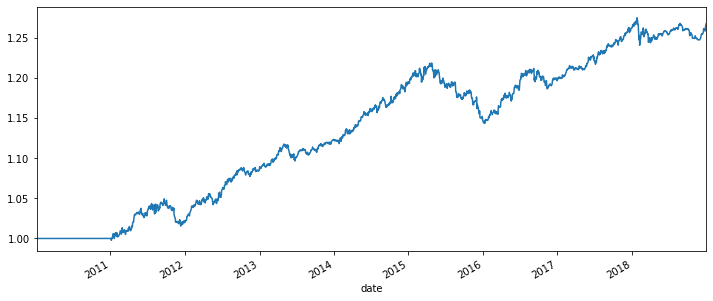

In [8]:
master_strategy.prices.plot()

In [9]:
# Using ffn to generate statistics
master_strategy.prices.calc_stats().display()

Stats for None from 2010-01-04 00:00:00+00:00 - 2018-12-31 00:00:00+00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
26.73%              1.05  2.67%   -6.15%

Annualized Returns:
mtd    3m     6m     ytd    1y     3y     5y     10y    incep.
-----  -----  -----  -----  -----  -----  -----  -----  --------
1.57%  0.53%  1.03%  0.46%  0.46%  3.36%  2.44%  2.67%  2.67%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  1.05     1.09       0.89
mean    2.67%    2.69%      3.06%
vol     2.54%    2.46%      3.44%
skew    -0.62    -0.54      -1.18
kurt    4.04     0.80       1.14
best    0.83%    1.85%      6.46%
worst   -1.01%   -1.94%     -3.76%

Drawdowns:
max     avg       # days
------  ------  --------
-6.15%  -0.39%     20.43

Misc:
---------------  ------
avg. up month    0.64%
avg. down month  -0.45%
up year %        87.50%
12m up %         86.